In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../Dataset/train_X.csv')
df_test = pd.read_csv('../Dataset/test_X.csv')
df_test_id = df_test[['patient_id']]
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,126956,125763,26,75.0,23.147277,0,Asian,M,163.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
1,18184,25399,54,42.0,35.071807,1,Caucasian,F,157.5,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses
2,51597,7974,81,39.0,NaN,0,African American,M,182.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
3,40078,79625,161,62.0,42.070672,0,Hispanic,F,157.0,Accident & Emergency,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal
4,130673,88261,29,82.0,NaN,0,Caucasian,F,NaN,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44934,88819,81966,64,67.0,20.622289,1,Caucasian,F,142.2,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal
44935,45825,3470,161,63.0,35.054523,0,Caucasian,M,175.2,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
44936,92992,109497,133,73.0,24.920113,0,Caucasian,M,167.6,Accident & Emergency,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
44937,29502,72376,54,69.0,27.202393,1,Native American,M,170.2,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44939 entries, 0 to 44938
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   44939 non-null  int64  
 1   patient_id                     44939 non-null  int64  
 2   hospital_id                    44939 non-null  int64  
 3   age                            42874 non-null  float64
 4   bmi                            43288 non-null  float64
 5   elective_surgery               44939 non-null  int64  
 6   ethnicity                      44239 non-null  object 
 7   gender                         44926 non-null  object 
 8   height                         44308 non-null  float64
 9   icu_admit_source               44888 non-null  object 
 10  icu_id                         44939 non-null  int64  
 11  icu_stay_type                  44939 non-null  object 
 12  icu_type                       44939 non-null 

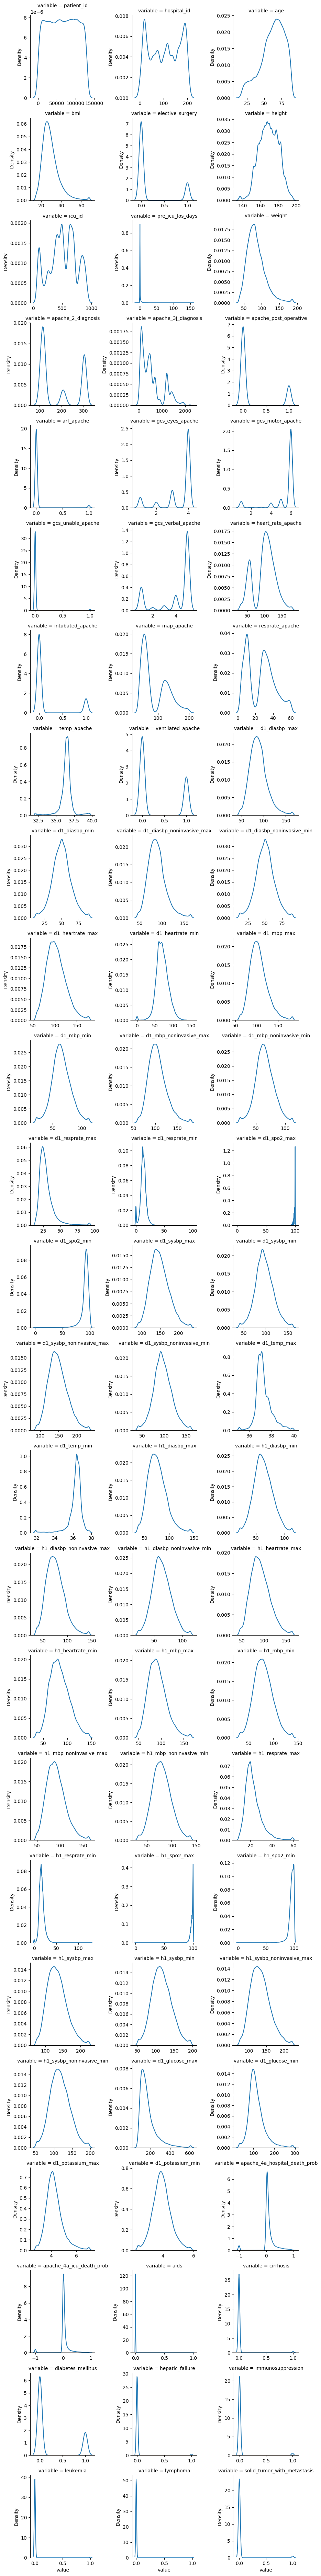

In [5]:
unpivot = pd.melt(df, df.describe().columns[0], df.describe().columns[1:])
fig2 = sns.FacetGrid(unpivot, col = 'variable', col_wrap = 3,
                    sharex = False, sharey = False)
fig2.map(sns.kdeplot, "value")

In [6]:
df = df.drop(columns=['encounter_id', 'patient_id', 'hospital_id', 'icu_id'])
df_test = df_test.drop(columns=['encounter_id', 'patient_id', 'hospital_id', 'icu_id'])
df.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,75.0,23.147277,0,Asian,M,163.0,Accident & Emergency,admit,Neuro ICU,0.128472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
1,42.0,35.071807,1,Caucasian,F,157.5,Operating Room / Recovery,admit,CTICU,3.150694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses
2,39.0,NaN,0,African American,M,182.9,Accident & Emergency,admit,Med-Surg ICU,0.006944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
3,62.0,42.070672,0,Hispanic,F,157.0,Accident & Emergency,admit,Med-Surg ICU,0.084722,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal
4,82.0,NaN,0,Caucasian,F,NaN,Accident & Emergency,admit,Med-Surg ICU,0.121528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [7]:
#extract the only row
Y = pd.read_csv('../Dataset/train_y.csv')
print((Y == 0).mean() * 100)

has_died    91.370524
dtype: float64


In [8]:
def fill0(df):
    print(df.isnull().sum(axis = 0).sort_values(ascending = False))

    #threshold = int(0.95*df.shape[0])
    #df = df.dropna(axis=1, thresh=threshold)

    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

    print(df.isnull().sum(axis = 0).sort_values(ascending = False))
    
fill0(df)
fill0(df_test)

d1_potassium_min            4748
d1_potassium_max            4748
h1_mbp_noninvasive_max      4495
h1_mbp_noninvasive_min      4495
apache_4a_icu_death_prob    3891
                            ... 
pre_icu_los_days               0
icu_stay_type                  0
icu_type                       0
elective_surgery               0
apache_post_operative          0
Length: 79, dtype: int64
age                    0
h1_heartrate_min       0
h1_spo2_max            0
h1_resprate_min        0
h1_resprate_max        0
                      ..
d1_diasbp_max          0
ventilated_apache      0
temp_apache            0
resprate_apache        0
apache_2_bodysystem    0
Length: 79, dtype: int64
d1_potassium_min            1989
d1_potassium_max            1989
h1_mbp_noninvasive_max      1861
h1_mbp_noninvasive_min      1861
apache_4a_icu_death_prob    1706
                            ... 
pre_icu_los_days               0
icu_stay_type                  0
icu_type                       0
elective_surger

In [9]:
def encoding(df, mode='label'):
    if mode=='label':
        non_numeric = df.select_dtypes(exclude=['number']).columns
        df_non_numeric = df[non_numeric]
    
        fig, ax = plt.subplots(nrows=len(non_numeric), ncols=1, figsize=(6, 18))
    
        for i, column in enumerate(df_non_numeric):
            grouped_df = pd.concat([df_non_numeric[column], Y['has_died']], axis=1)
            grouped_data = grouped_df.groupby(column)['has_died'].value_counts(normalize=True).unstack().fillna(0)
            grouped_data = grouped_data.sort_values(0)
    
            grouped_data.plot(kind='barh', stacked=True, ax=ax[i], color=['skyblue', 'salmon'])
    
            grouped_dict = {value: index for index, value in enumerate(reversed(grouped_data.index))}
            df_non_numeric[column] = df_non_numeric[column].map(grouped_dict)
    
        df_non_numeric.head()
        df.update(df_non_numeric)
    elif mode=='one_hot':
        return pd.get_dummies(df)

df = encoding(df, mode='one_hot')
df_test = encoding(df_test, mode='one_hot')
df_test.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,80.0,28.081633,1,175.0,0.018750,86.00,308.0,1903.03,1,0.0,...,False,False,False,False,False,False,False,False,False,True
1,56.0,38.376067,0,175.3,0.179167,117.93,112.0,107.01,0,0.0,...,True,False,False,False,False,False,False,False,False,False
2,87.0,14.844926,0,168.0,0.192361,39.30,119.0,601.01,0,0.0,...,False,False,False,False,False,False,False,True,False,False
3,76.0,35.822294,0,152.4,0.520833,83.20,302.0,109.12,0,0.0,...,True,False,False,False,False,False,False,False,False,False
4,20.0,34.933333,0,150.0,0.143056,78.60,122.0,703.03,0,0.0,...,False,False,False,True,False,False,False,False,False,False


In [10]:
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [11]:
def grid_search(model, param_dict, X, y):
    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(model, param_grid=param_dict, scoring='f1_macro', cv=stratified_cv, verbose=2)
    grid_search.fit(X, y)
    
    return grid_search.best_params_, grid_search.best_estimator_, grid_search.best_score_

In [12]:
df = df.astype(float)
smote = SMOTE(random_state=42)
df_resampled, Y_resampled = smote.fit_resample(df, Y)

def bin_cont_split(df):
    binary_col = [col for col in df if np.isin(df[col].unique(), [0, 1]).all()]
    continuous_col = list(set(df.columns) - set(binary_col))
    df_binary = df_resampled[binary_col]
    df_continuous = df_resampled[continuous_col]

    return df_binary, df_continuous

df_binary, df_continuous = bin_cont_split(df_resampled)

In [13]:
'''
xgb tree
label encoding
stratified cross validation

print("{'n_estimators': 140} 0.9596436902351597")
print("{'n_estimators': 131} 0.9596680272501098")
print("{'max_depth': 40}     0.9628475519533979")
print("{'max_depth': 32}     0.9630065772574248")
'''

'''
xgb tree
label encoding
cross validation
print("{'n_estimators': 190} 0.9396363316997907")
print("{'n_estimators': 198} 0.9397990987568052")
print("{'max_depth': 30}     0.9425902658299599")
print("{'max_depth': 36}     0.9426109108136199")
'''

'''
xgb tree
one-hot encoding
stratified cross validation

print("{'n_estimators': 140} 0.9596051142849127")
print("{'n_estimators': 142} 0.9596538654360678")
print("{'max_depth': 20}     0.9625288074131394")
print("{'max_depth': 17}     0.9630040757247691")
'''

'''
xgb tree binary only
one-hot encoding
stratified cross validation

print("{'n_estimators': 60} 0.9472157592122095")
print("{'n_estimators': 62} 0.9472666813009394")
print("{'max_depth': 10}    0.9463203375493615")
print("{'max_depth': 6}     0.9472666813009394")
'''

'no code man'

'no code man'

In [14]:
'''
xgb_clf = xgb.XGBClassifier(random_state=42)
feature_num = df_binary.shape[1]
print(feature_num)

print('roughly test estimator')
param_dict = {'n_estimators': [i for i in range(10, 200, 10)]}
best_param, best_estimator, best_score = grid_search(xgb_clf, param_dict, df_binary, Y_resampled)
esti_10 = best_param['n_estimators']
print(best_param, best_score, end='\n\n')

print('precisely test estimator')
param_dict = {'n_estimators': [i for i in range(esti_10-10, esti_10+10)]}
best_param, best_estimator, best_score = grid_search(xgb_clf, param_dict, df_binary, Y_resampled)
esti_1 = best_param['n_estimators']
print(best_param, best_score, end='\n\n')

xgb_clf = best_estimator

print('roughly test depth')
param_dict = {'max_depth': [i for i in range(10, feature_num, 10)]}
best_param, best_estimator, best_score = grid_search(xgb_clf, param_dict, df_binary, Y_resampled)
depth_10 = best_param['max_depth']
print(best_param, best_score, end='\n\n')

print('precisely test depth')
param_dict = {'max_depth': [i for i in range(depth_10-10, depth_10+10, 1) if i <= feature_num]}
best_param, best_estimator, best_score = grid_search(xgb_clf, param_dict, df_binary, Y_resampled)
depth_1 = best_param['max_depth']
print(best_param, best_score, end='\n\n')

xgb_clf = best_estimator
'''

'no code man'

'no code man'

In [15]:
'''
lr_gre = LogisticRegression(random_state=42, n_jobs=-1)

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
best_param, best_estimator, best_score = grid_search(lr_gre, parameters, df_continuous, Y_resampled)
print(best_param)
lr_gre = best_estimator

if solver != 'newton_cg' and solver != 'lbfgs' and solver != 'sag':
    parameters = [{'penalty':['none', 'elasticnet', 'l1', 'l2']}]
else:
    parameters = [{'penalty':['none', 'elasticnet', 'l2']}]
best_param, best_estimator, best_score = grid_search(lr_gre, parameters, df_continuous, Y_resampled)
print(best_param)
lr_gre = best_estimator

parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
best_param, best_estimator, best_score = grid_search(lr_gre, parameters, df_continuous, Y_resampled)
print(best_param)
lr_gre = best_estimator
'''

'no code man'

'no code man'

In [16]:
xgb_clf = xgb.XGBClassifier(random_state=42, n_estimators=62, max_depth=6)
lr_gre = LogisticRegression(random_state=42, n_jobs=-1, C=0.001, penalty='none', solver='newton-cg')

vot_clf = VotingClassifier(
    estimators=[
        ('xgb_clf', xgb_clf),
        ('lr_gre', lr_gre)
    ],
    voting='soft'
)

In [17]:
def visualize(model, X_test, y_test, cm, roc):
    y_pred = model.predict(X_test)
    # Evaluate using macro f1-score
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1]).plot(ax=cm)
    cm.set_title(f'Confusion Matrix\nMacro F1 Score: {macro_f1:.2f}')
    cm.set_xlabel('Predicted Label')
    cm.set_ylabel('True Label')
    
    y_probs = model.predict_proba(X_test)[:, 1]
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    # Calculate the AUC-ROC score
    auc_score = roc_auc_score(y_test, y_probs)

    # Plot the ROC curve
    roc.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    roc.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
    roc.set_title('ROC Curve')
    roc.set_xlabel('False Positive Rate')
    roc.set_ylabel('True Positive Rate')
    roc.legend()

In [18]:
import joblib
import os

# Create subplots
splits = 5
skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)

if os.path.exists('../vot_clf.joblib'):
    print('Model already exists, load model...')
    vot_clf = joblib.load('../vot_clf.joblib')
else:
    print('Model not exist, train model...')
    for i, (train_index, test_index) in enumerate(skf.split(df_resampled, Y_resampled)):
        print('\tFold:', i+1)
        bin_train_fold, cont_train_fold = df_binary.iloc[train_index], df_continuous.iloc[train_index]
        X_train_fold, y_train_fold = df_resampled.iloc[train_index], Y_resampled.iloc[train_index]
        
        print('\t\tBase model fitting...')
        xgb_clf.fit(bin_train_fold, y_train_fold)
        lr_gre.fit(cont_train_fold, y_train_fold)
        
        print('\t\tVoting classifier fitting...')
        vot_clf.fit(X_train_fold, y_train_fold)
    
        print('\tEnd of Fold:', i+1, end='\n\n')

    joblib.dump(vot_clf, '../vot_clf.joblib')

Model already exists, load model...


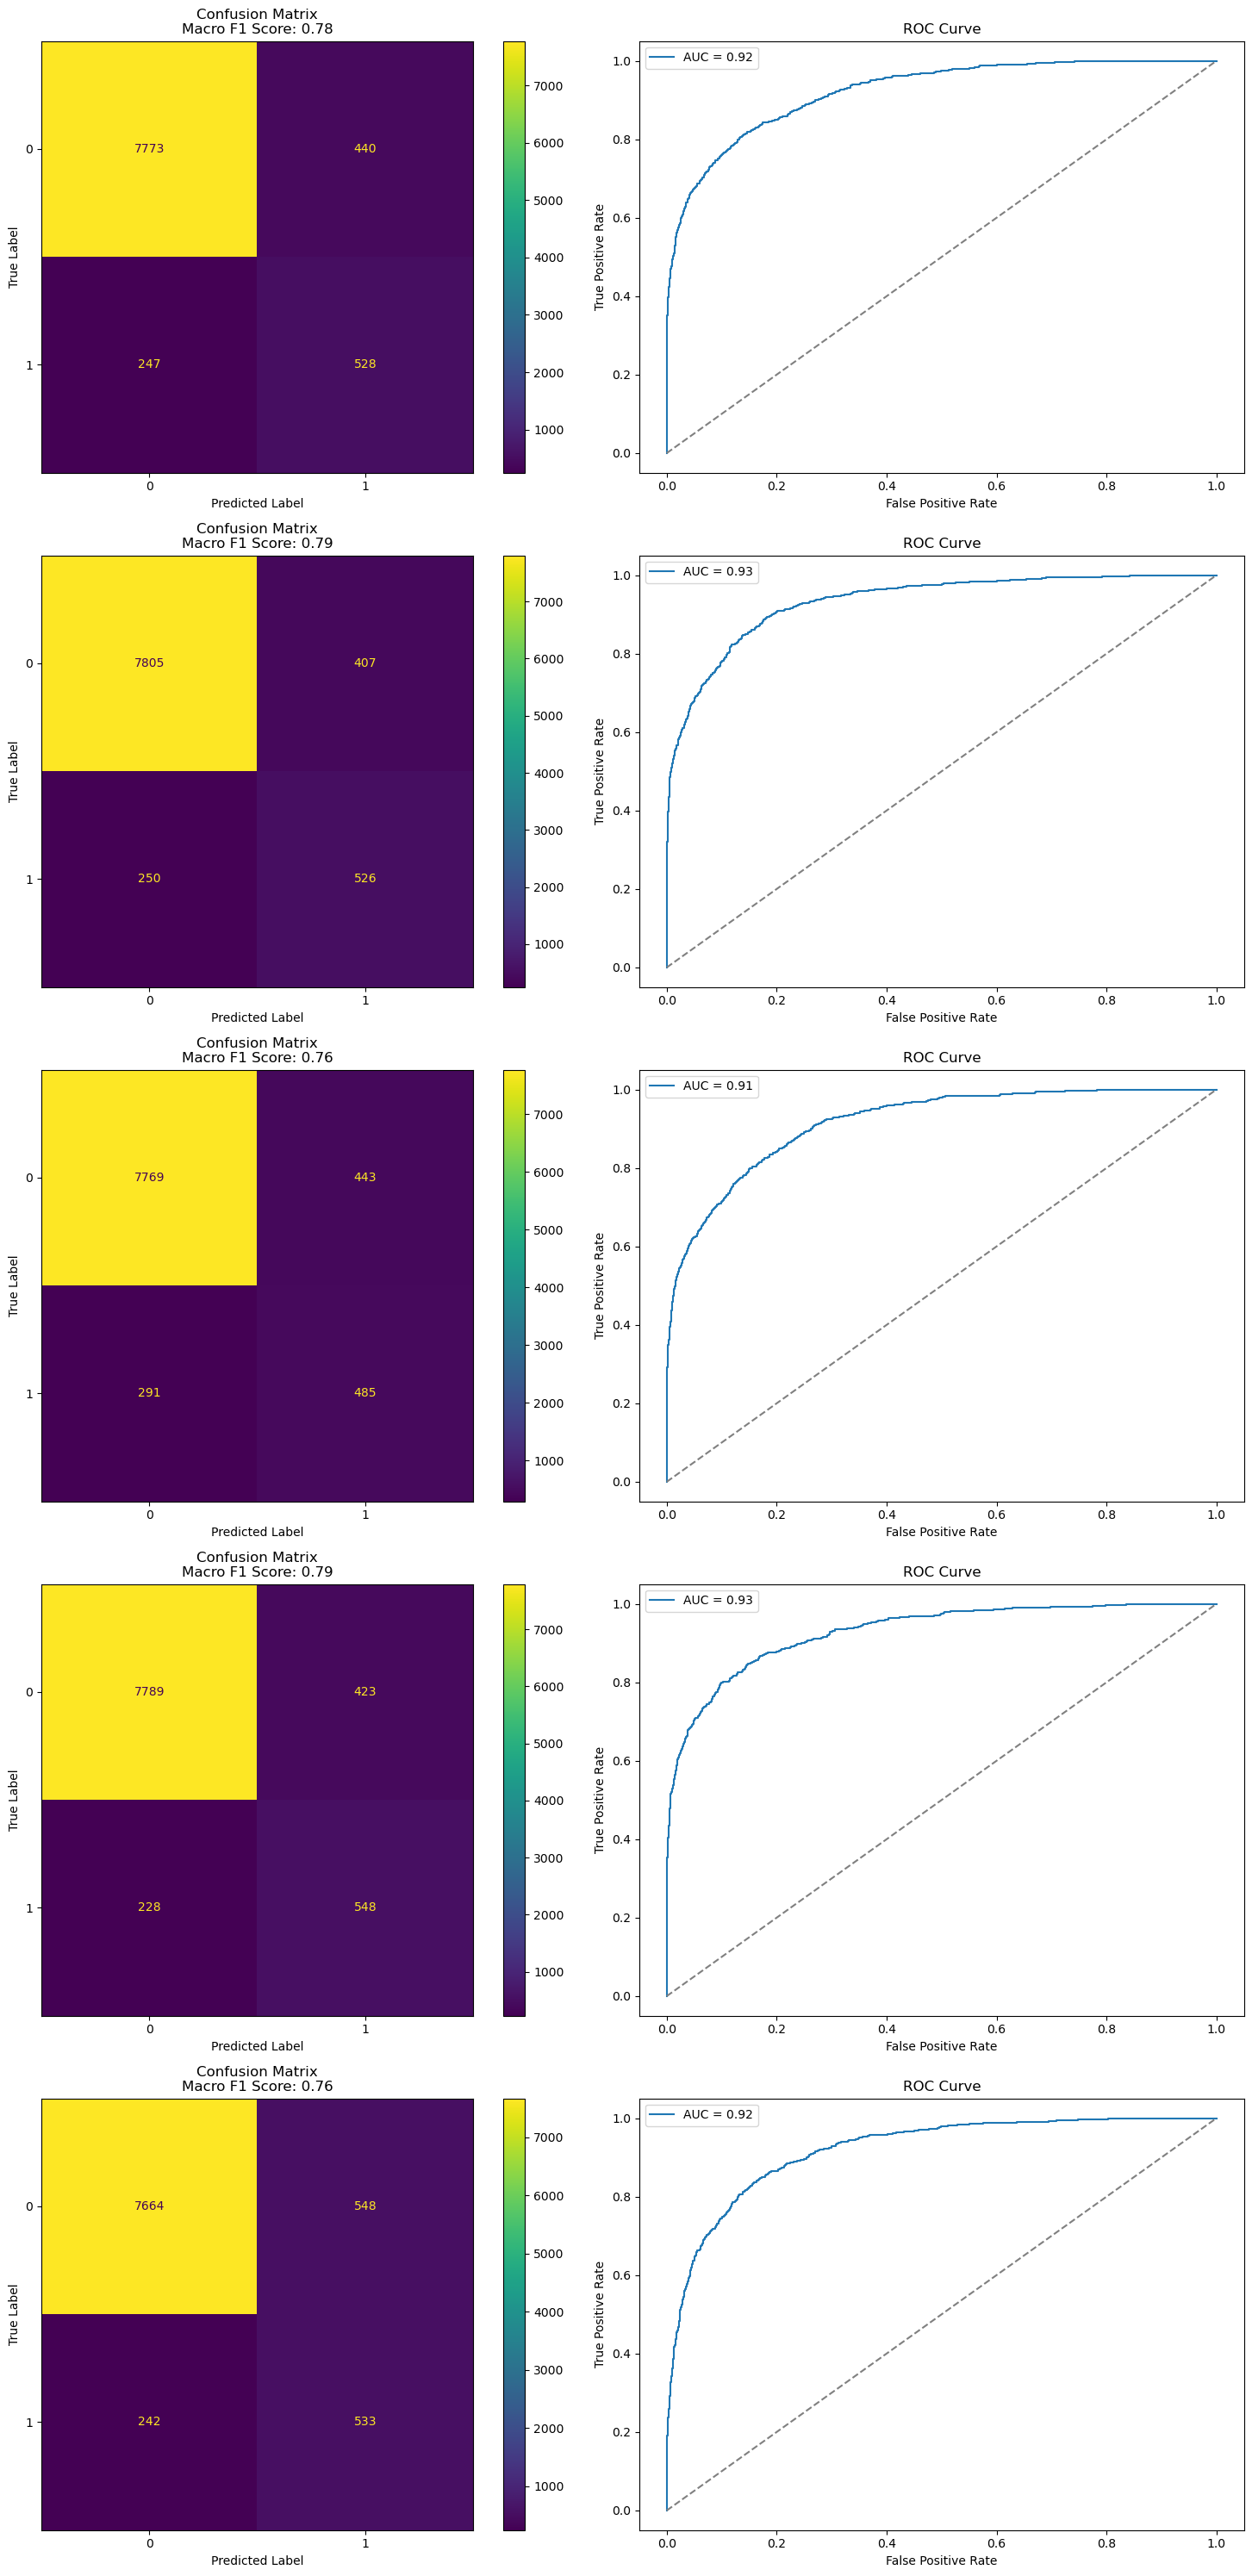

In [19]:
fig, axes = plt.subplots(nrows=splits, ncols=2, figsize=(15, 30))

for i, (train_index, test_index) in enumerate(skf.split(df, Y)):
    # Call the function for each fold and pass the corresponding subplot axes
    X_test_fold, y_test_fold = df.iloc[test_index], Y.iloc[test_index]
    visualize(vot_clf, X_test_fold, y_test_fold, axes[i, 0], axes[i, 1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [20]:
df_test = df_test.astype(float)
y_pred = vot_clf.predict(df_test)
#result = df_test[['patient_id']]
result = df_test_id
result['pred'] = y_pred
result.head()

result.to_csv('../testing_result.csv', index=None)

In [22]:
from sklearn.inspection import permutation_importance
# 使用 permutation_importance 评估特征重要性
result = permutation_importance(vot_clf, df, Y, n_repeats=30, random_state=42)

# 提取特征重要性得分及对应的特征名字
feature_importance_scores = result.importances_mean
feature_names = df.columns

In [23]:
# 排序并取前20名
top_20_indices = feature_importance_scores.argsort()[::-1][:30]
top_20_features = [feature_names[i] for i in top_20_indices]
top_20_features

['gender_M',
 'gender_F',
 'apache_3j_diagnosis',
 'apache_3j_bodysystem_Cardiovascular',
 'apache_post_operative',
 'apache_2_bodysystem_Cardiovascular',
 'h1_mbp_min',
 'icu_admit_source_Accident & Emergency',
 'icu_stay_type_admit',
 'h1_sysbp_noninvasive_max',
 'ethnicity_Caucasian',
 'age',
 'apache_3j_bodysystem_Neurological',
 'heart_rate_apache',
 'd1_sysbp_max',
 'd1_diasbp_noninvasive_min',
 'apache_2_bodysystem_Neurologic',
 'd1_sysbp_noninvasive_max',
 'h1_heartrate_max',
 'apache_3j_bodysystem_Gastrointestinal',
 'apache_2_bodysystem_Gastrointestinal',
 'icu_stay_type_transfer',
 'h1_spo2_min',
 'apache_3j_bodysystem_Respiratory',
 'ethnicity_African American',
 'd1_sysbp_noninvasive_min',
 'd1_heartrate_min',
 'd1_diasbp_max',
 'apache_2_bodysystem_Respiratory',
 'h1_diasbp_noninvasive_min']

In [ ]:
'''
 'gender',
 'apache_3j_diagnosis',
 'apache_3j_bodysystem',
 'apache_post_operative',
 'apache_2_bodysystem',
 'h1_mbp_min',
 'icu_admit_source',
 'icu_stay_type',
 'h1_sysbp_noninvasive_max',
 'ethnicity',
 'age',
 'heart_rate_apache',
 'd1_sysbp_max',
 'd1_diasbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'h1_heartrate_max',
 'h1_spo2_min',
 'd1_sysbp_noninvasive_min',
 'd1_heartrate_min',
 'd1_diasbp_max',
'''